# The BNP Kaggle Project


## 1. Overall Goal :  Raise the customer satisfaction by  statisfying 2 claims
###             1. Accelerated leading to faster payments
###              2. Identify the required information before  approval
### Operation: 
####              Use the anomyous data that BNP provided and achieve the highest score.
####              
####              Evaluation metric :  Log Loss 

In [2]:
####Check The Data Set
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
# Example: load a DSS dataset as a Pandas dataframe
train_dataset = dataiku.Dataset("train")
train_df = train_dataset.get_dataframe()

ImportError: No module named dataiku

In [1]:
train_audit = pdu.audit(train_df)
train_audit

NameError: name 'pdu' is not defined

## Problem? : 
###  1. Anonymized Data
### 2. Too Many Missing Value .
 * Approximately 40% of data is missing

In [24]:
%pylab inline

import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from string import letters

Populating the interactive namespace from numpy and matplotlib


In [41]:
# Load Train & Test dataset as a Pandas dataframe
dataset_train = dataiku.Dataset("train")
df_train = dataset_train.get_dataframe()
dataset_tEST = dataiku.Dataset("test")
df_test = dataset_test.get_dataframe()

In [42]:
train1 = df_train.drop(['ID'],axis=1)
test1 = df_test.drop(['ID'],axis=1)

In [43]:
target = train1.target
featureNames = train1.columns.values

In [44]:
def az_to_int(az,nanVal=None):
    if az==az:  #catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower())-ord('a')+1)*26**(len(az)-1-i)
        return hv
    else:
        if nanVal is not None:
            return nanVal
        else:
            return az

In [47]:
test1['target'] = -999
all_data = train1.append(test1)

# convert v22 to hexavigesimal
all_data.v22 = all_data.v22.apply(az_to_int)

for c in all_data.columns.values:
    if all_data[c].dtype=='object':
        all_data[c], tmpItter = all_data[c].factorize()

# replace all NA's with -1
all_data.fillna(-1, inplace=True)

# split the data
train1 = all_data[all_data['target']>-999]
test1 = all_data[all_data['target']==-999]
test1 = test1.drop(['target'],axis=1)

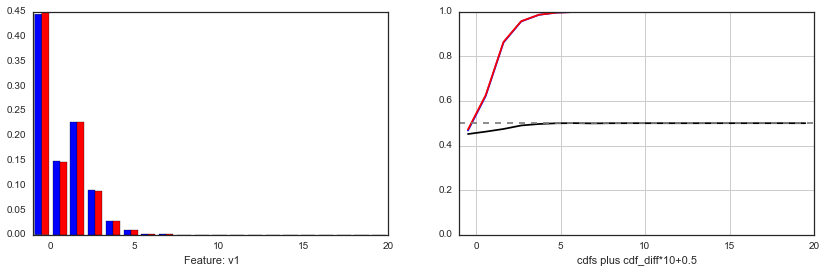

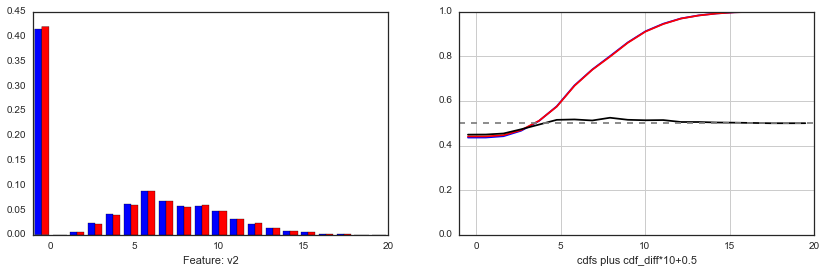

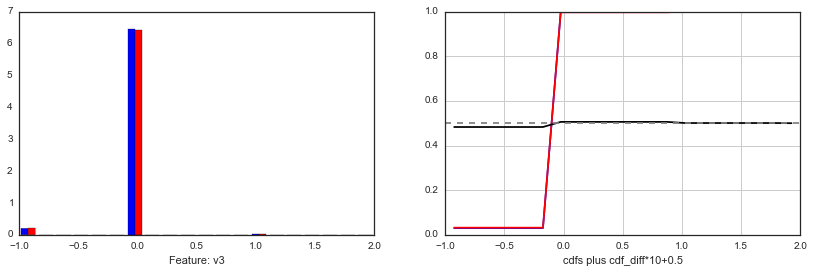

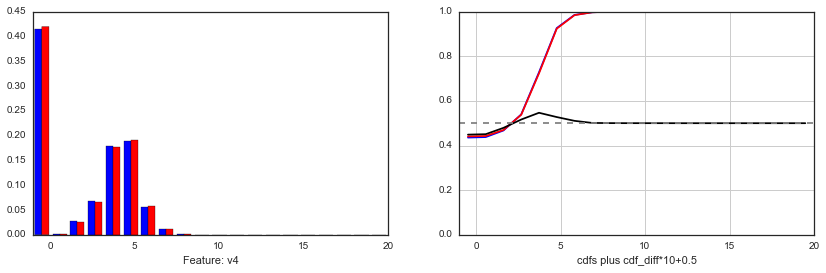

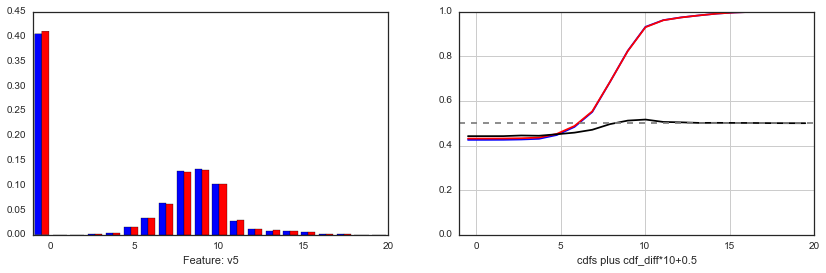

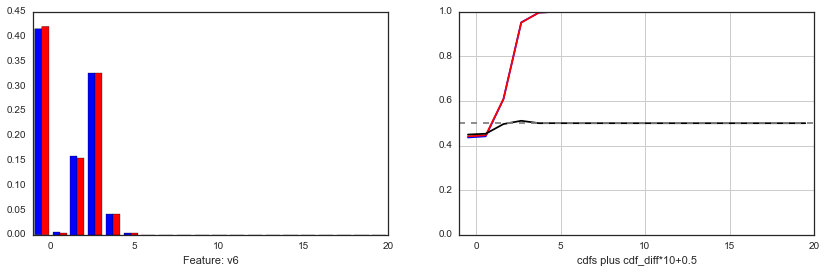

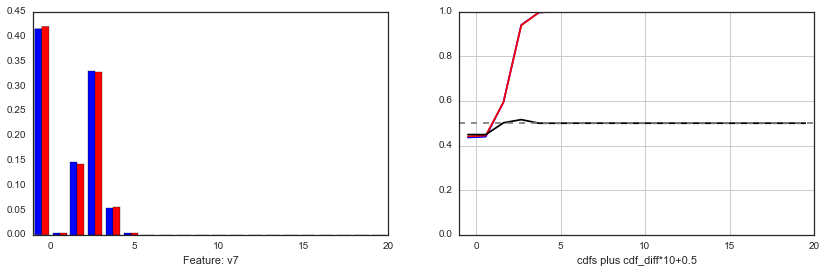

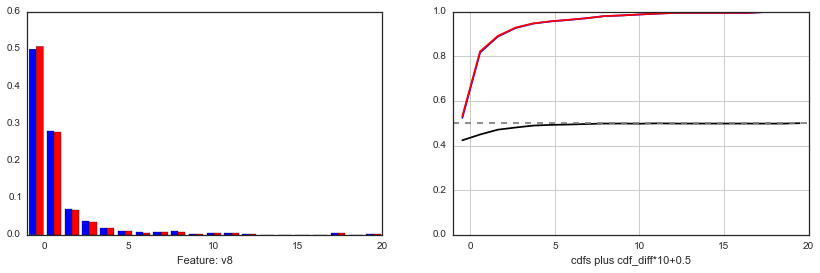

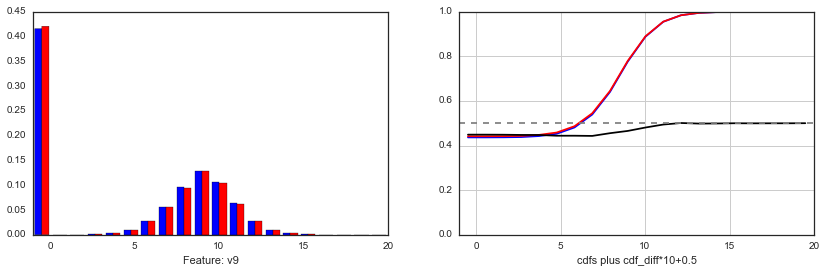

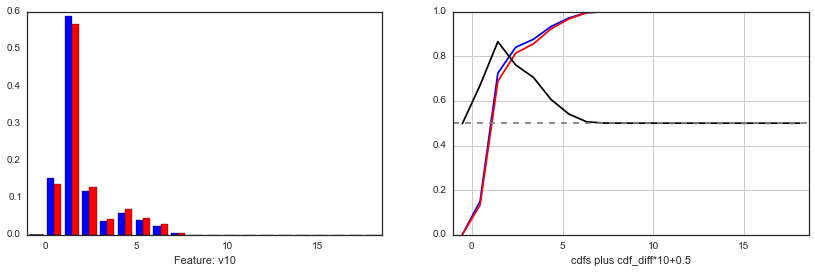

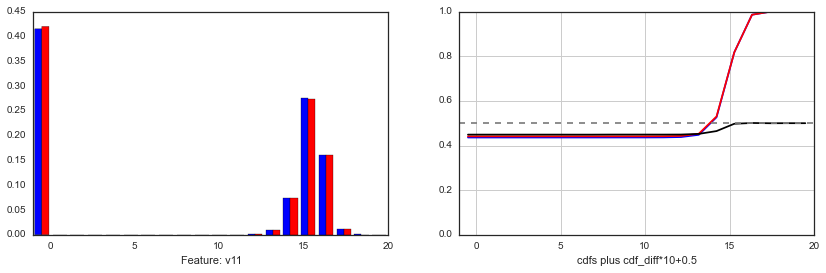

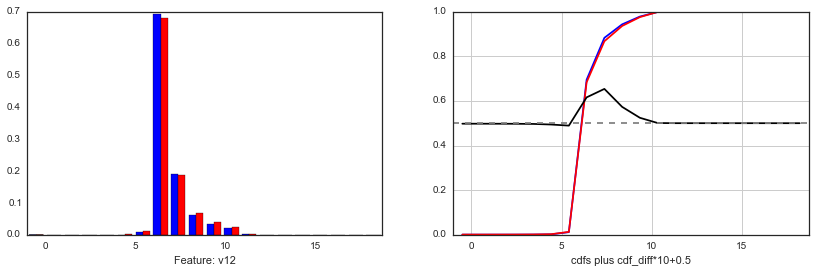

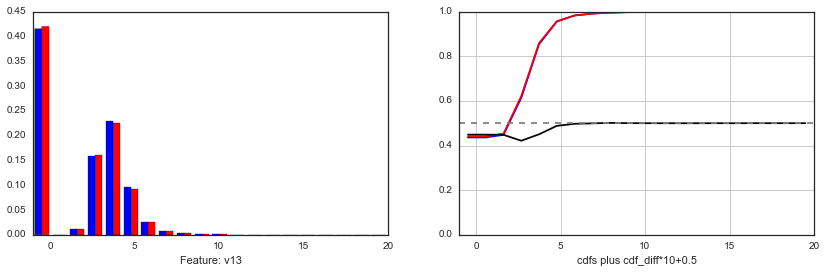

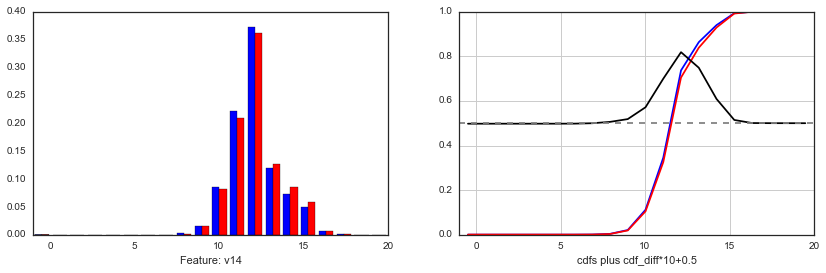

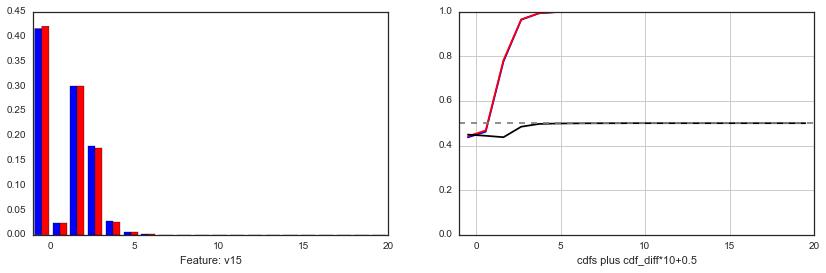

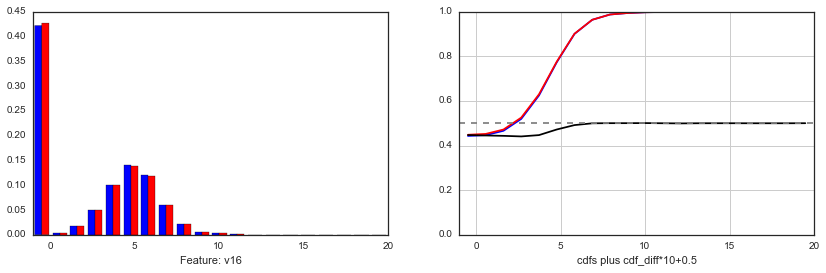

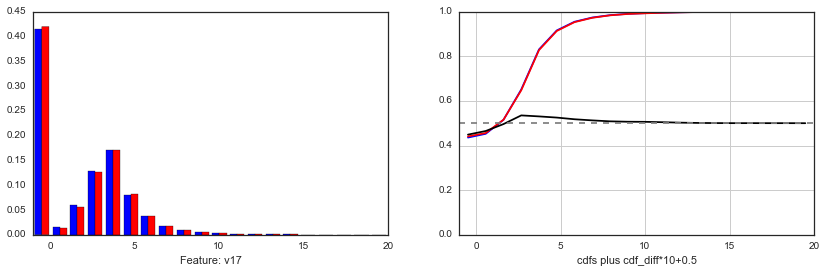

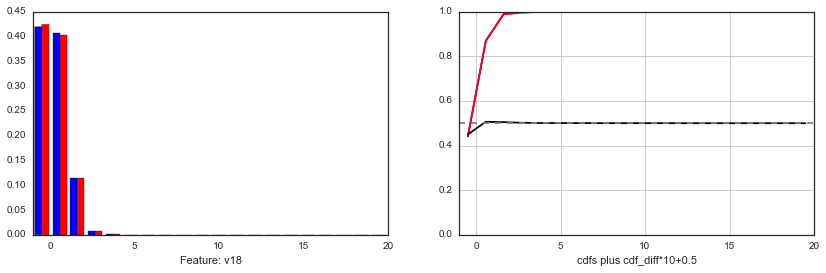

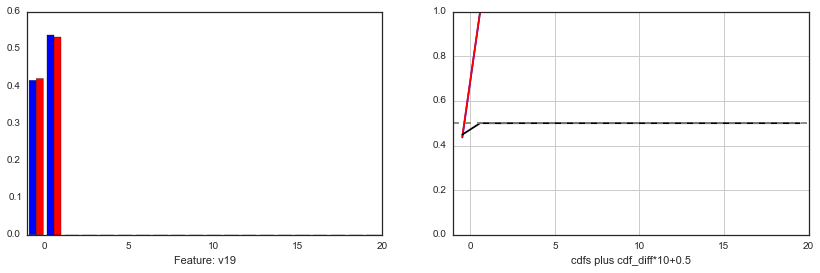

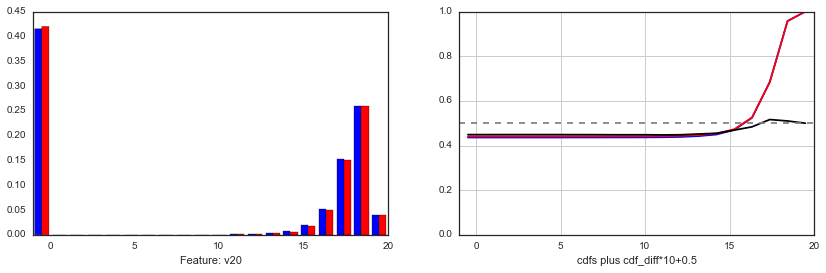

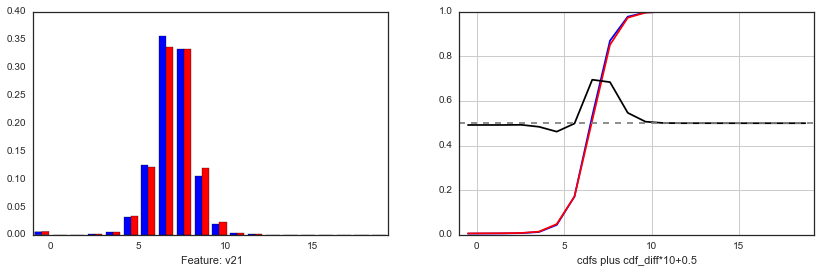

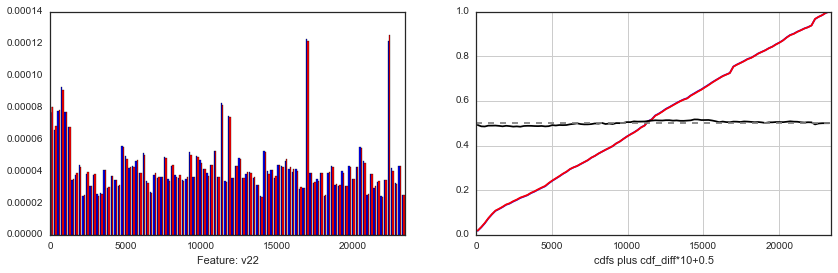

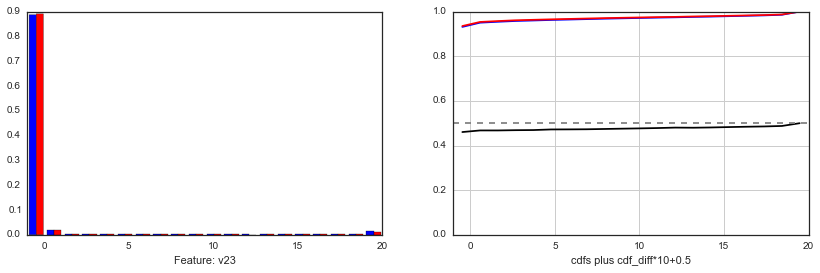

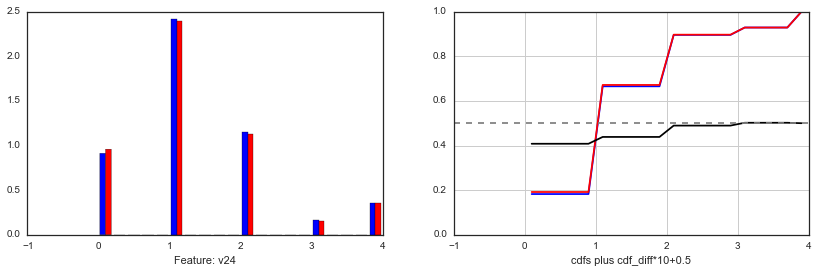

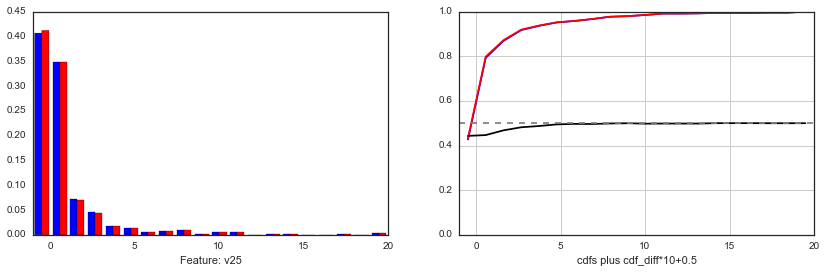

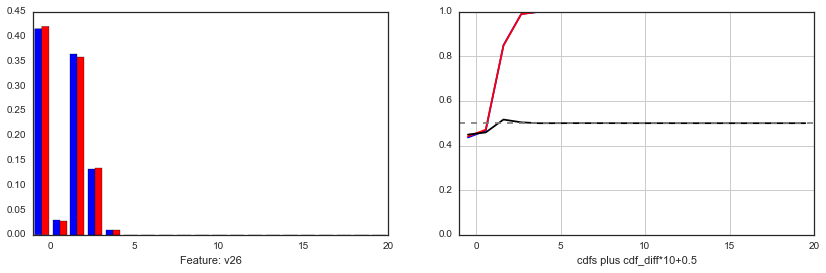

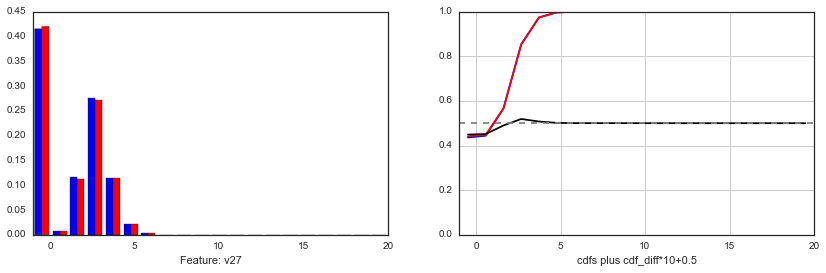

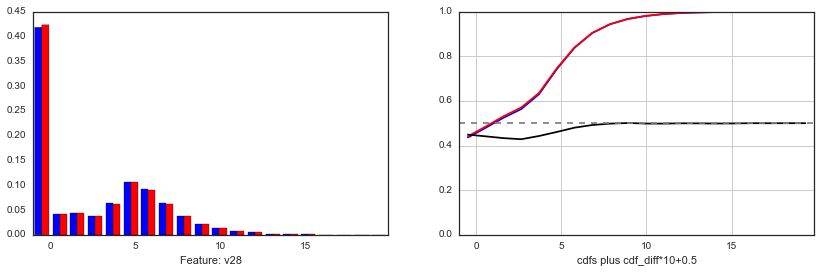

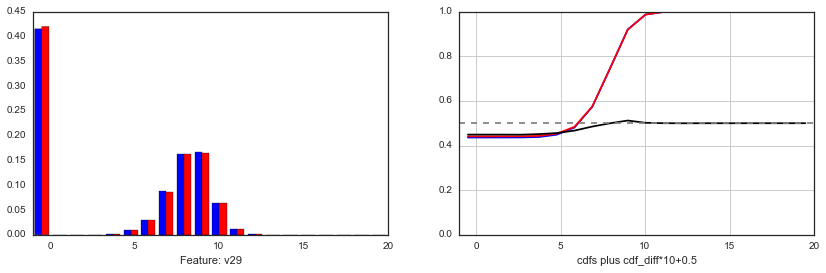

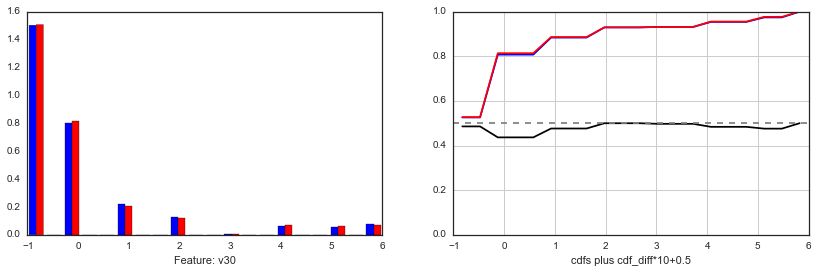

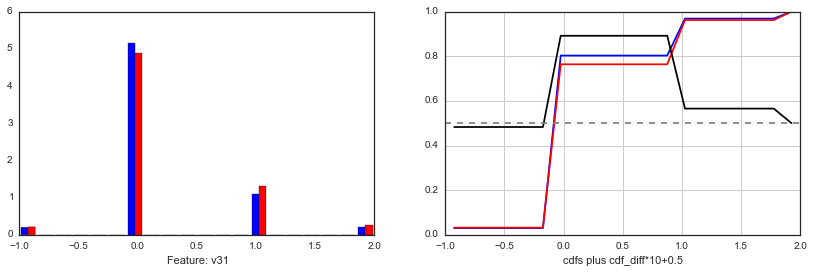

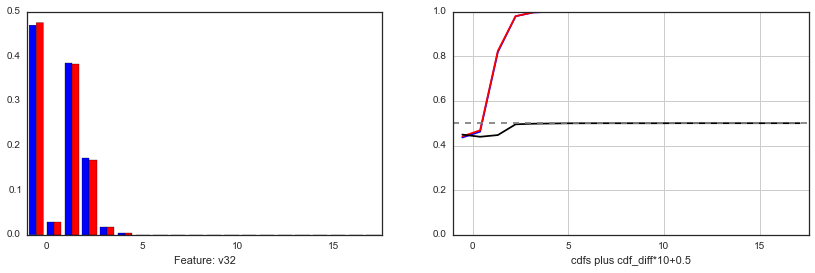

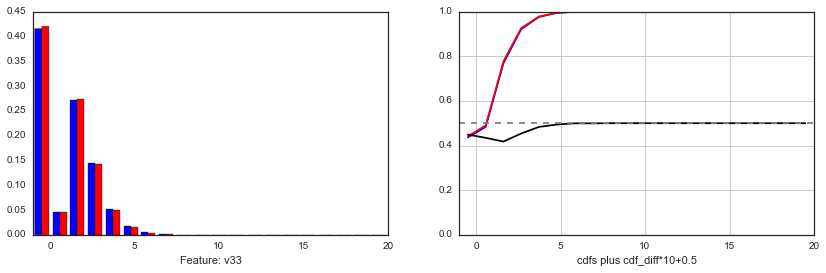

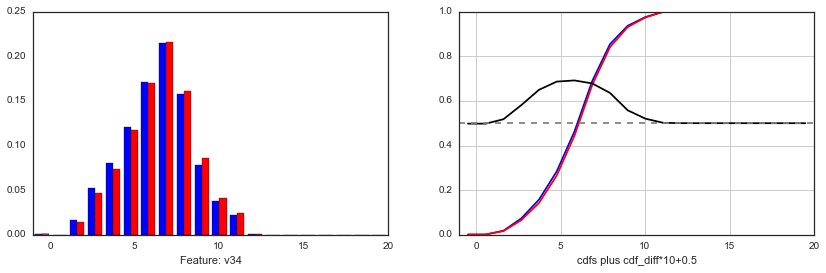

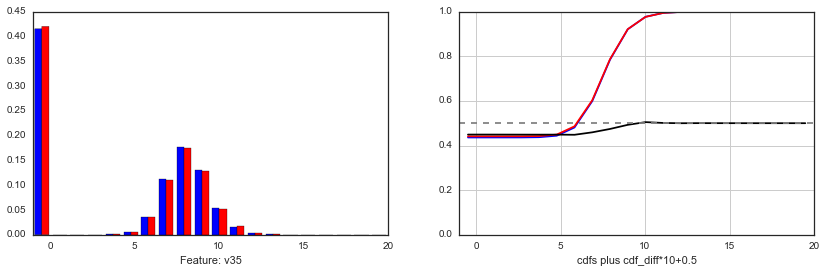

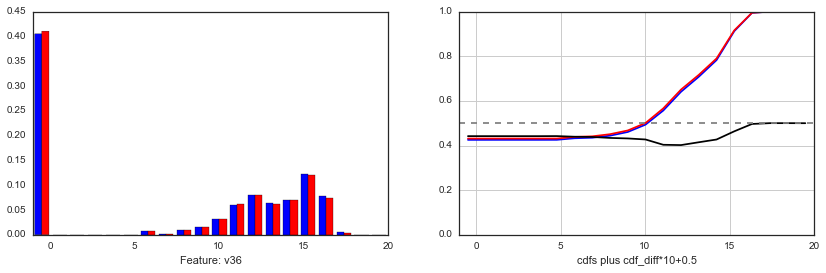

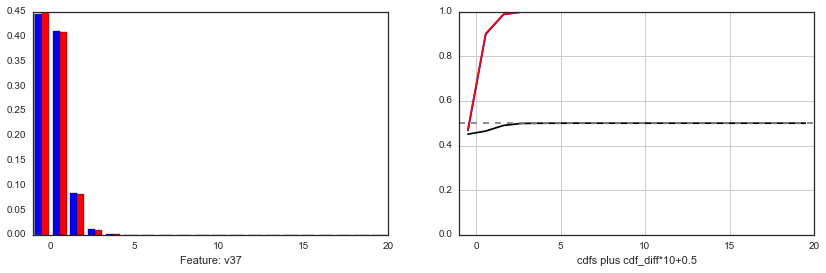

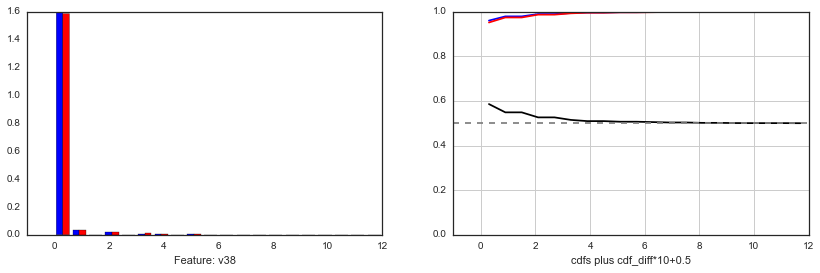

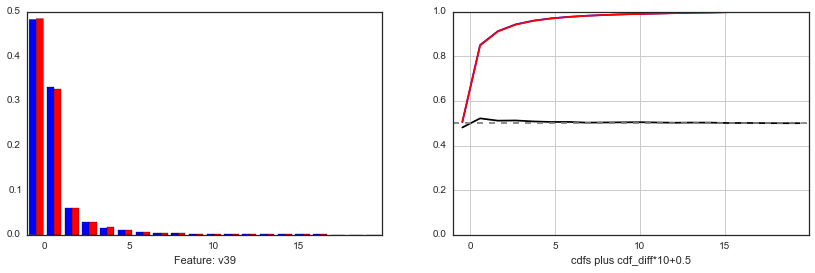

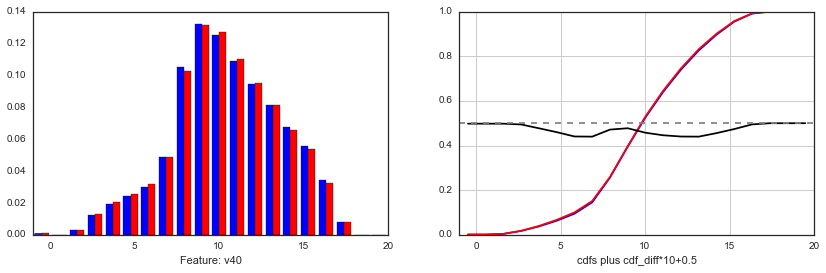

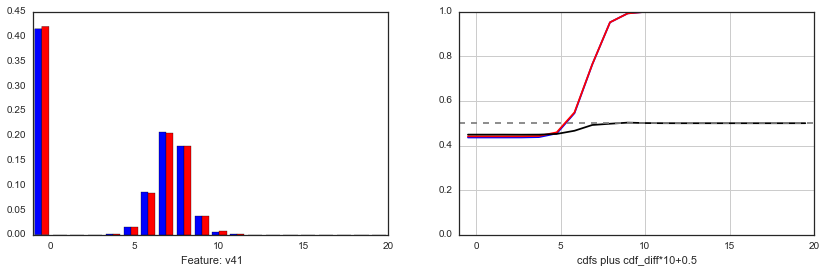

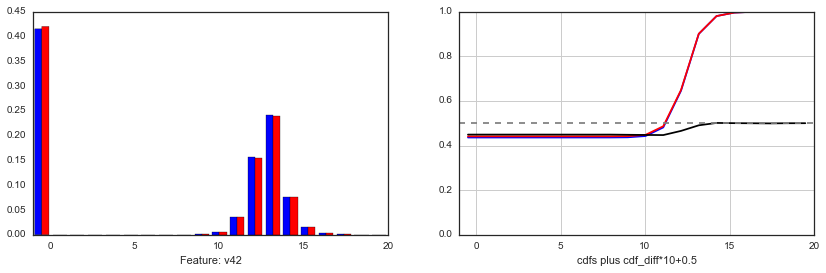

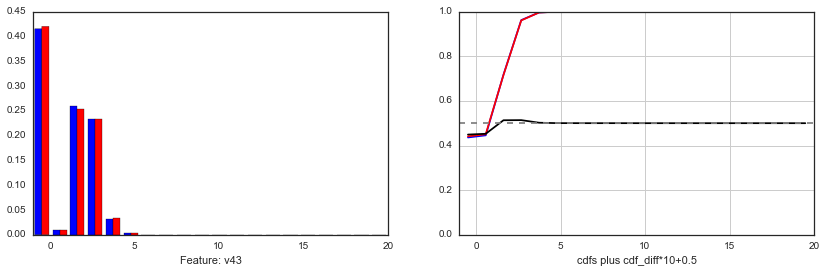

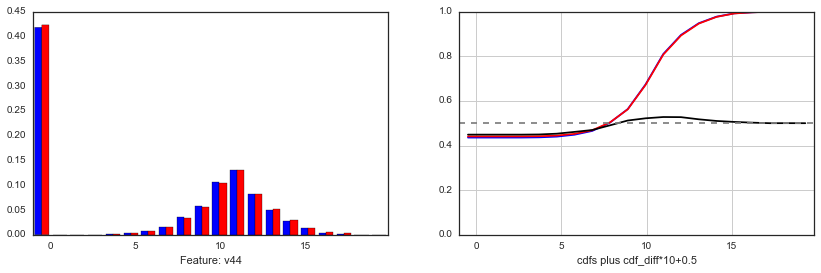

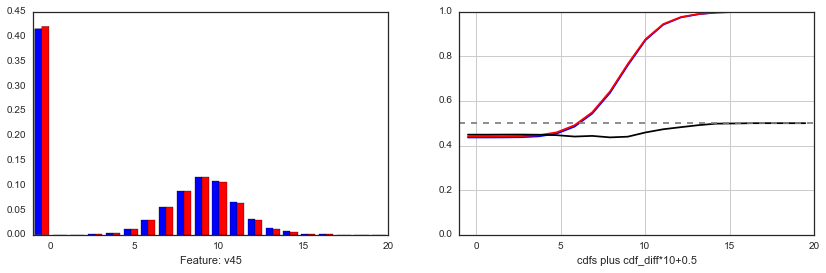

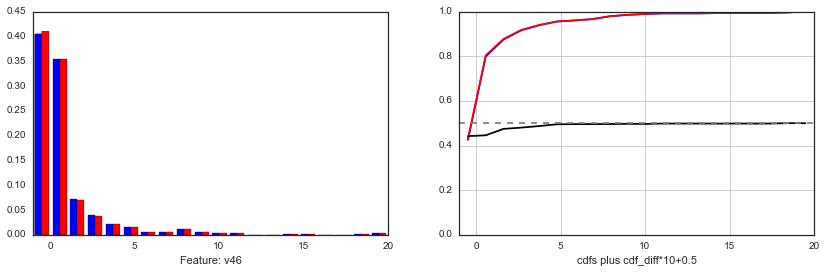

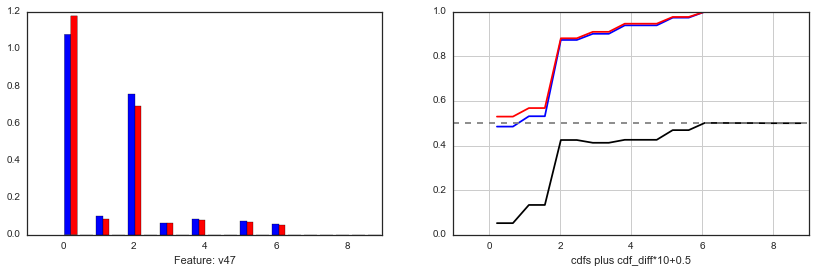

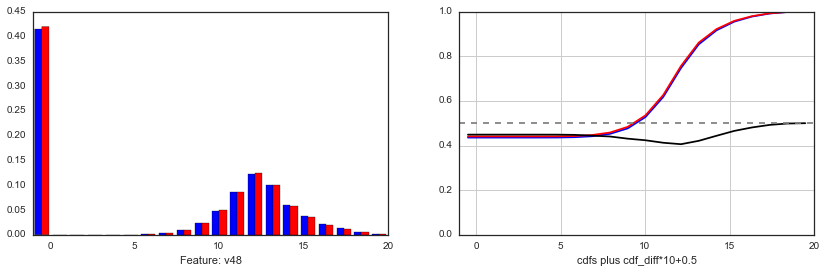

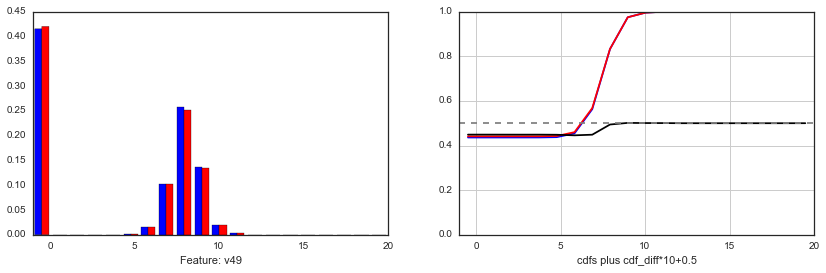

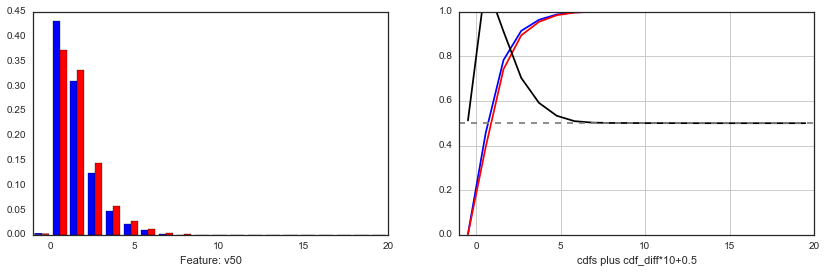

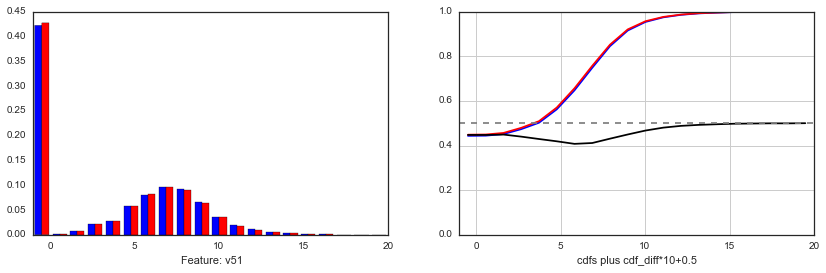

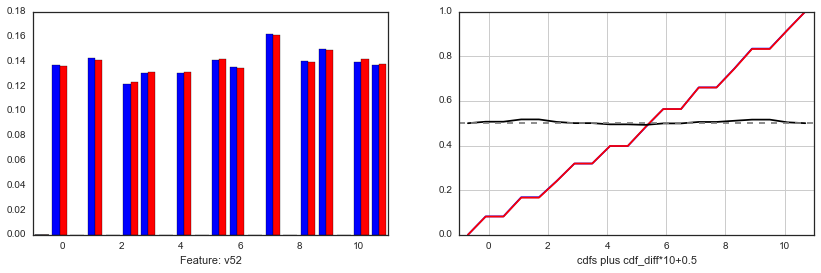

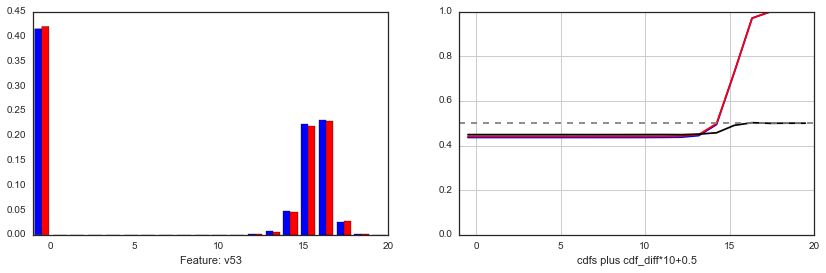

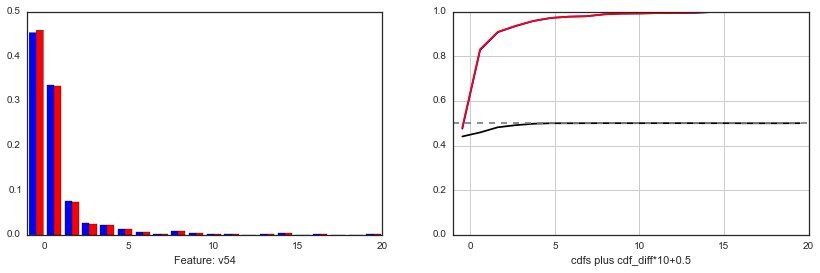

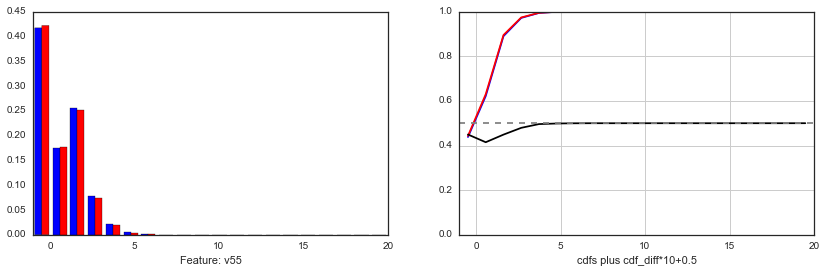

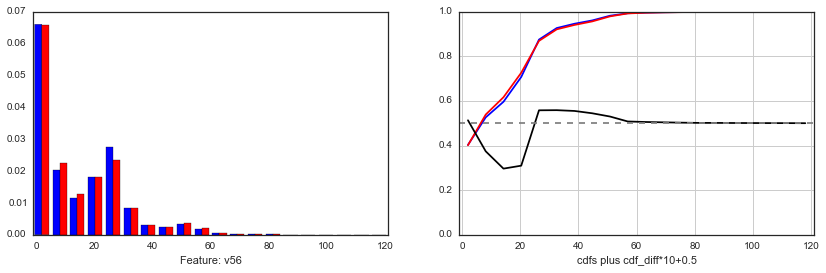

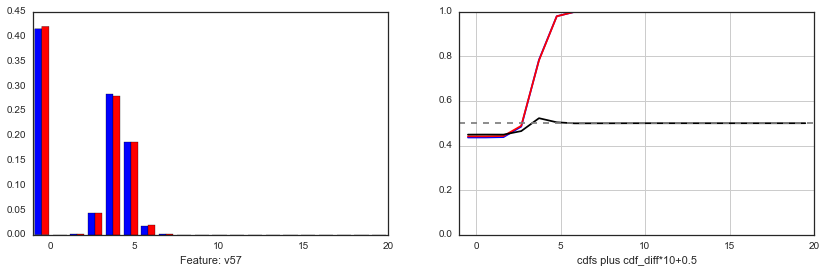

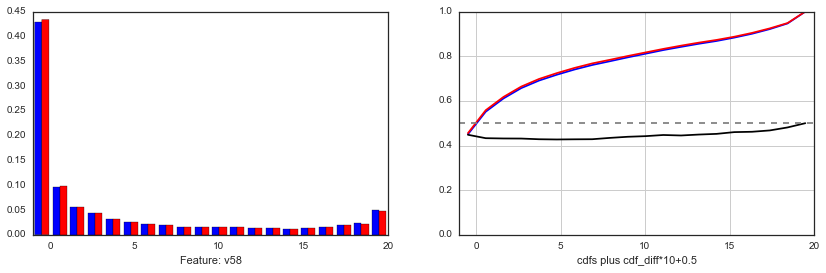

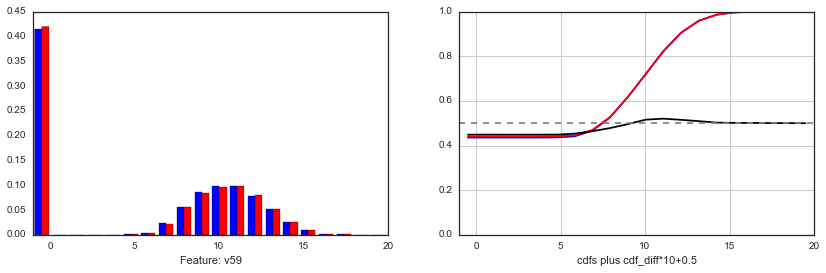

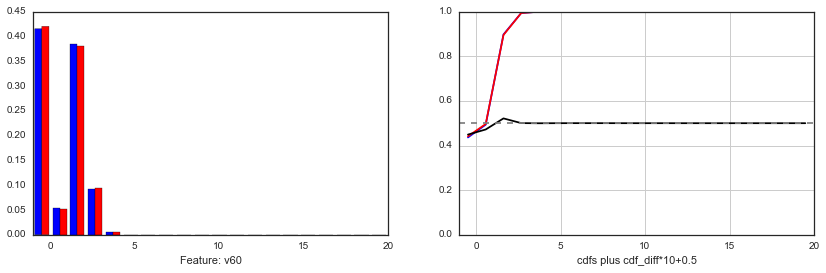

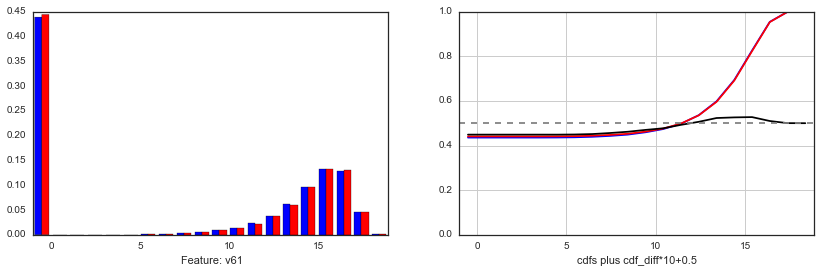

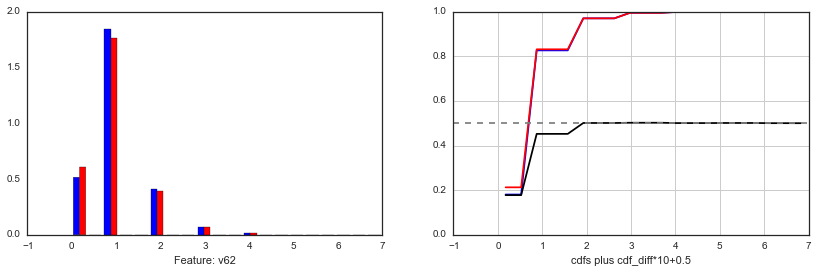

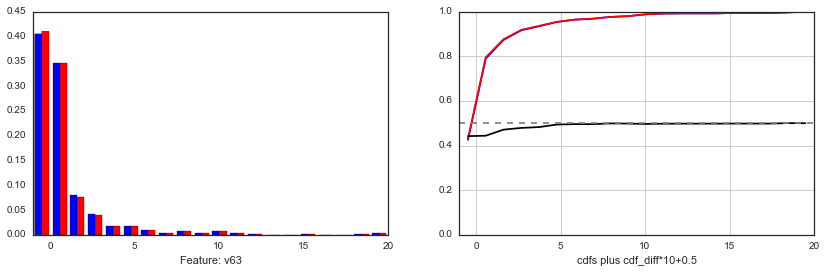

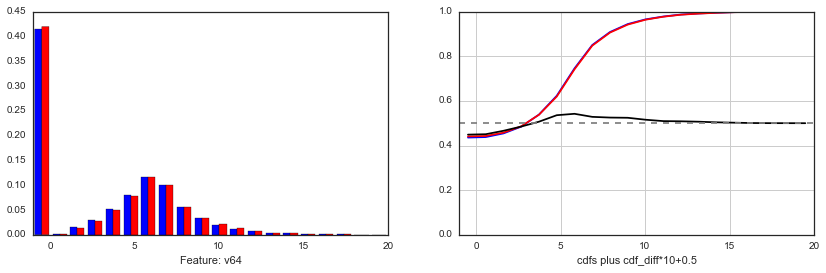

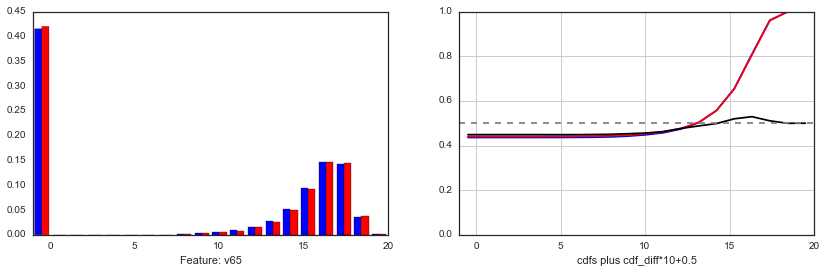

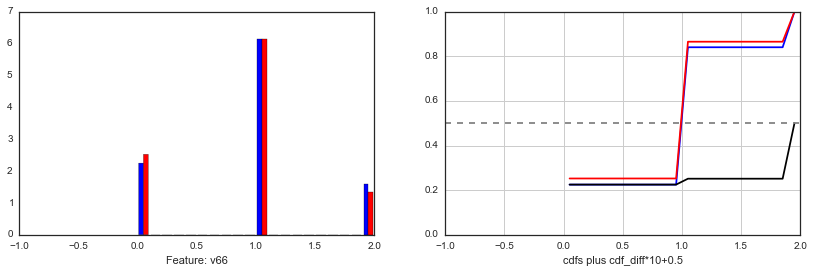

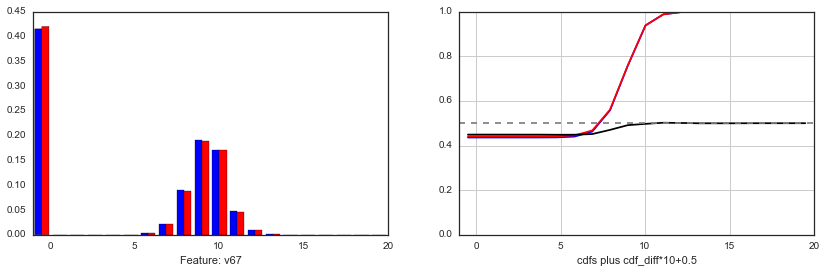

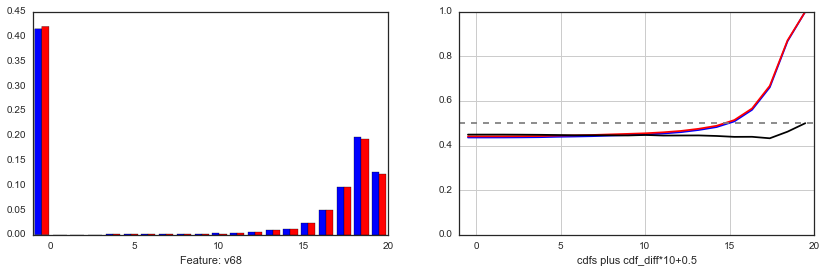

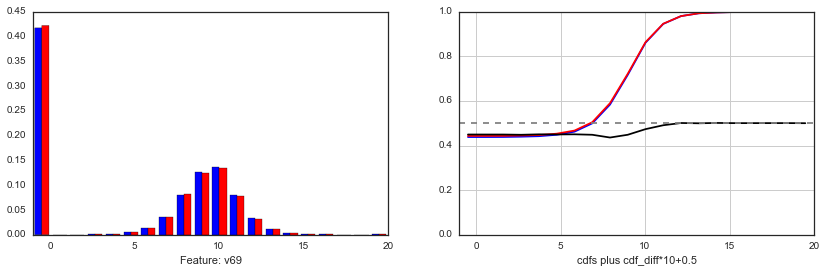

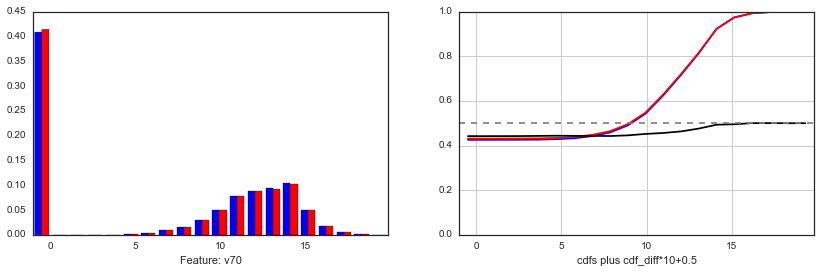

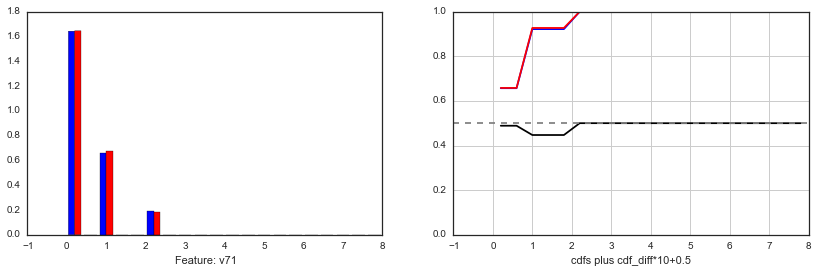

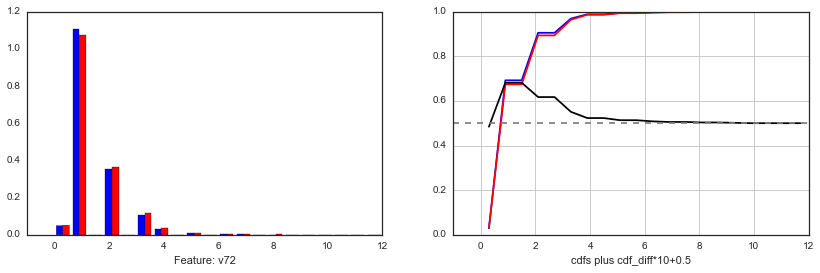

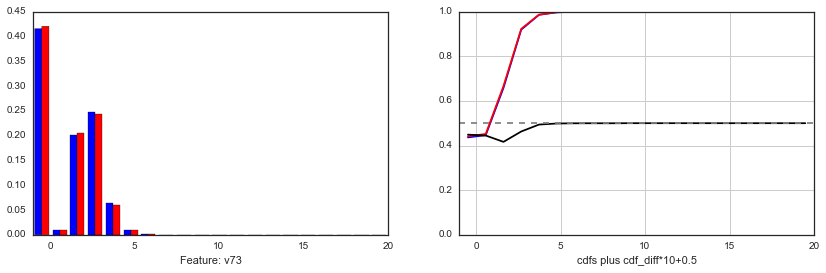

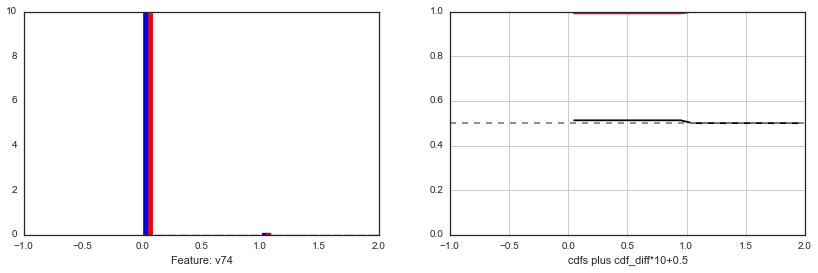

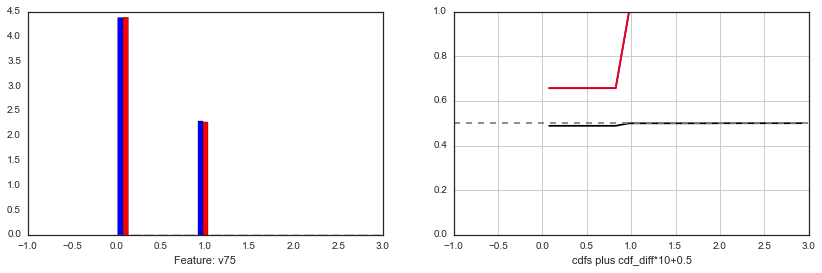

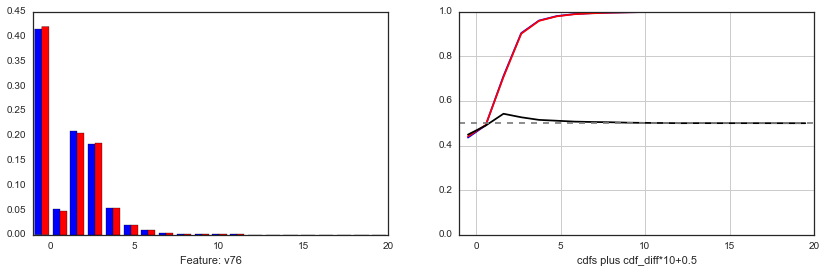

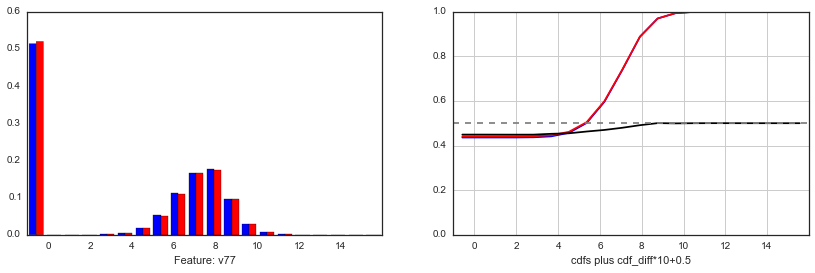

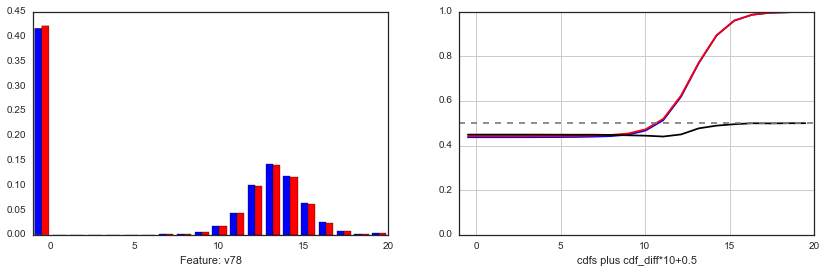

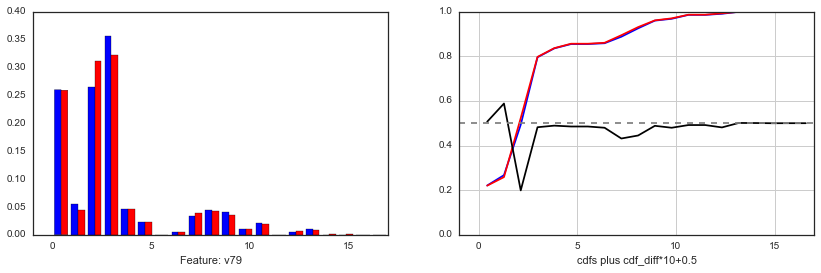

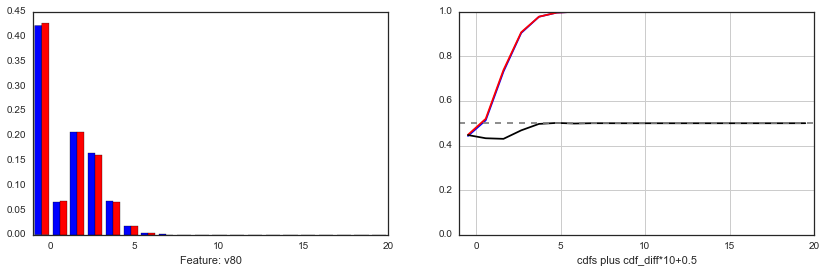

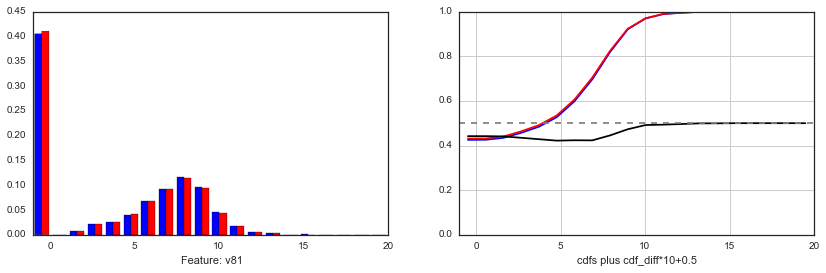

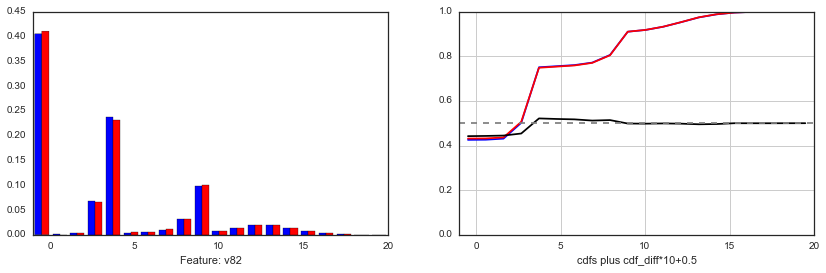

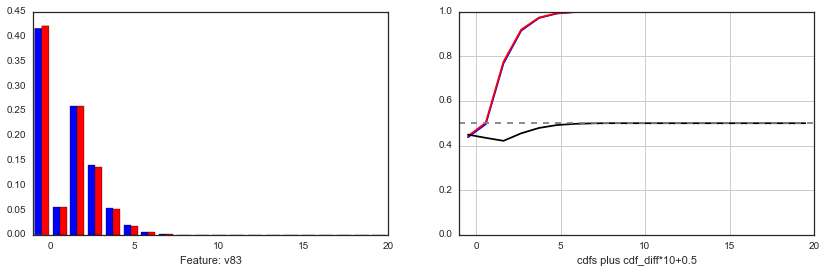

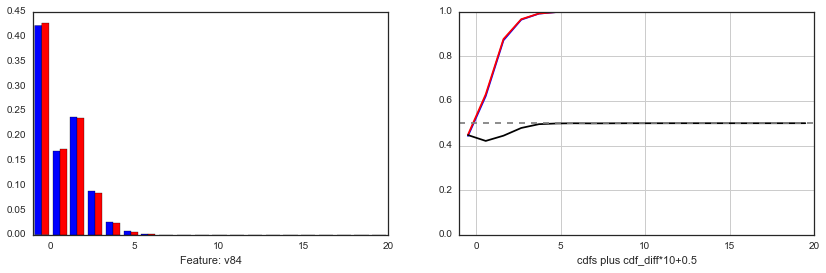

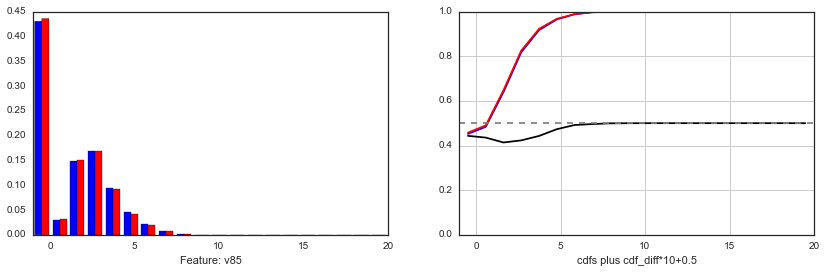

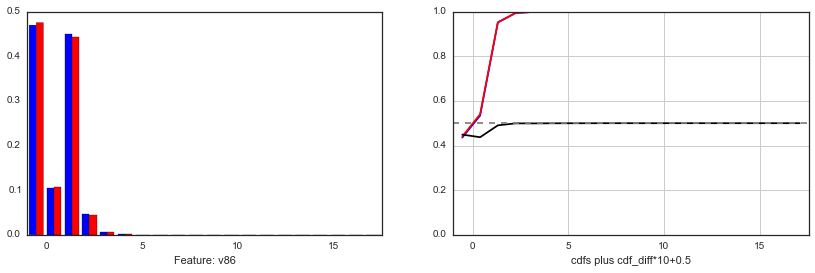

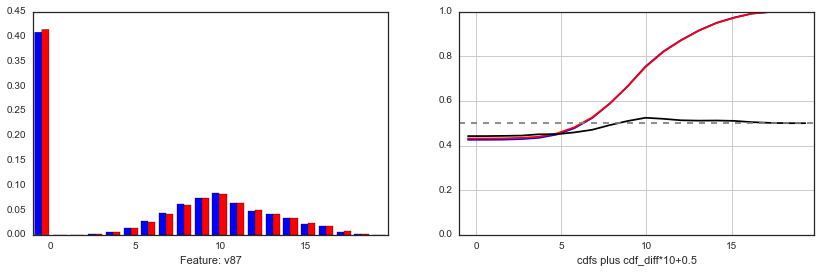

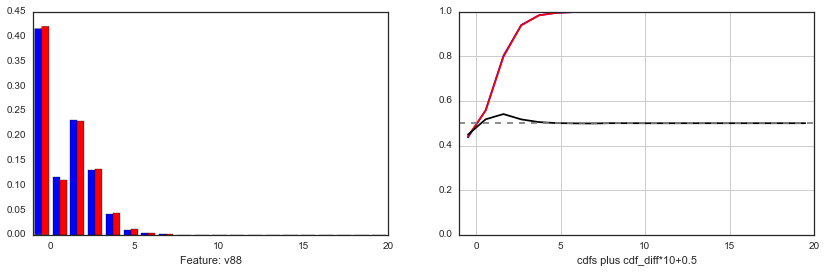

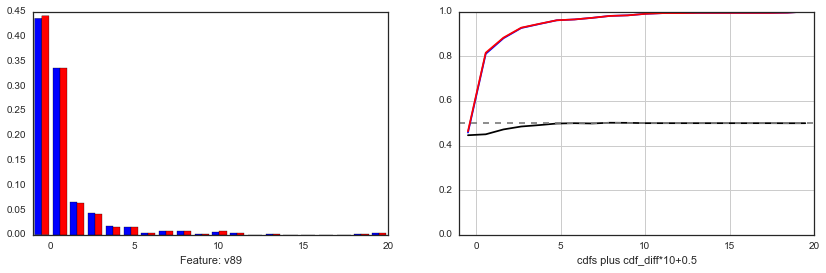

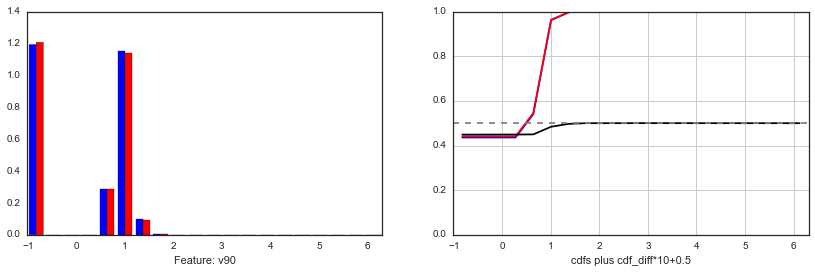

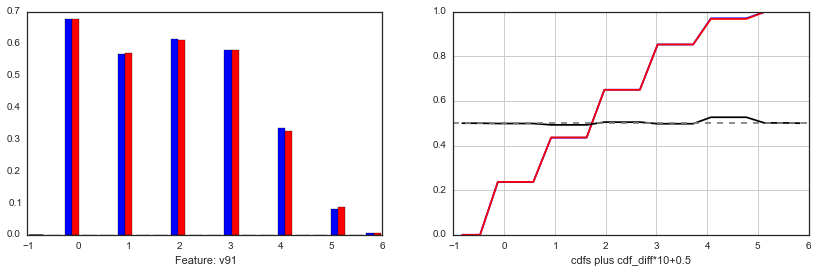

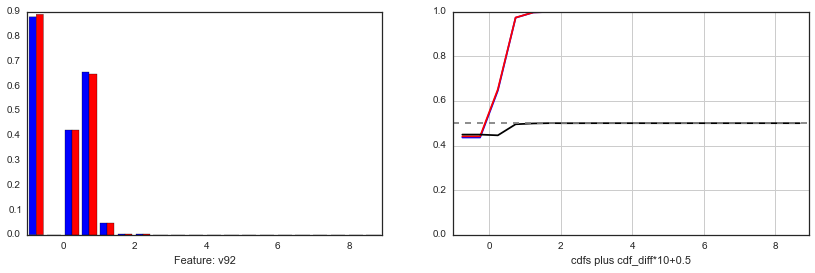

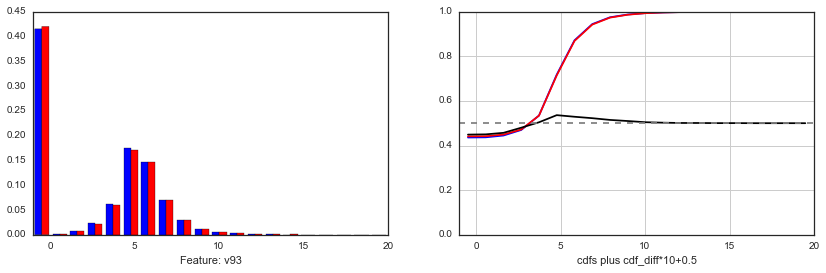

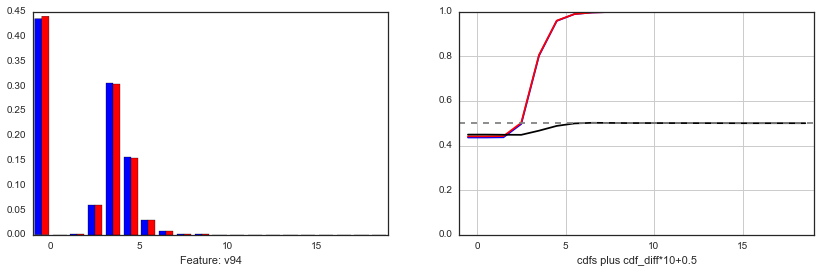

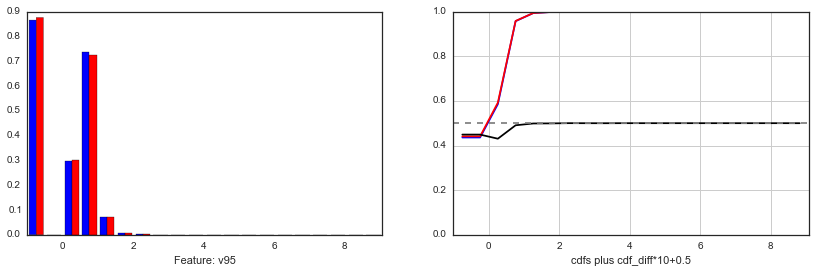

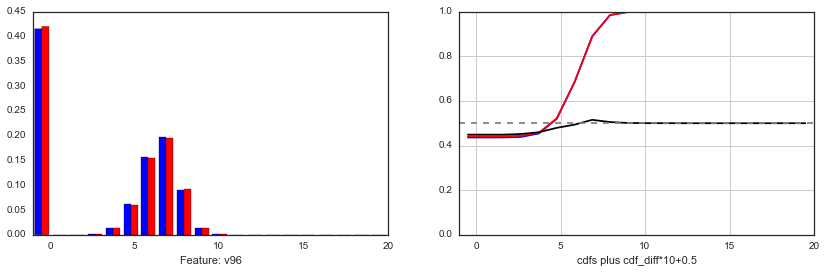

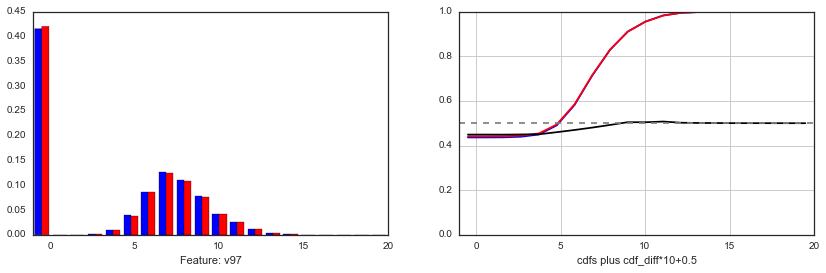

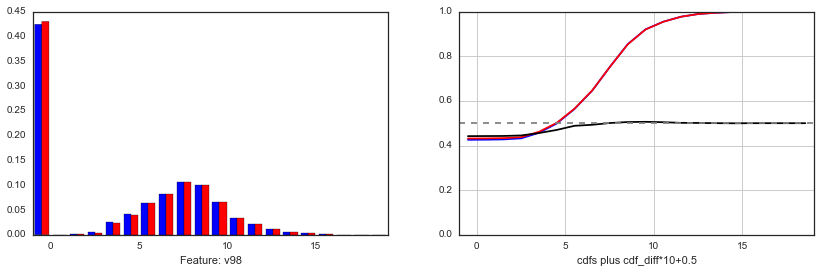

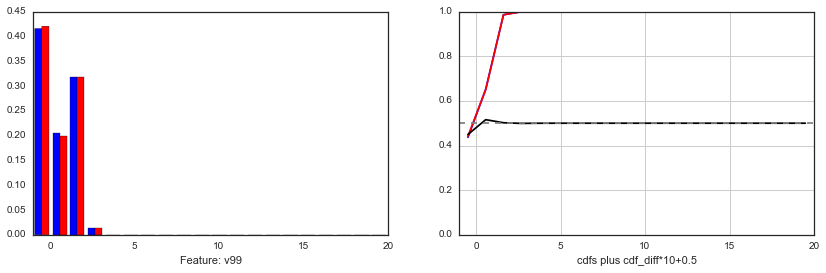

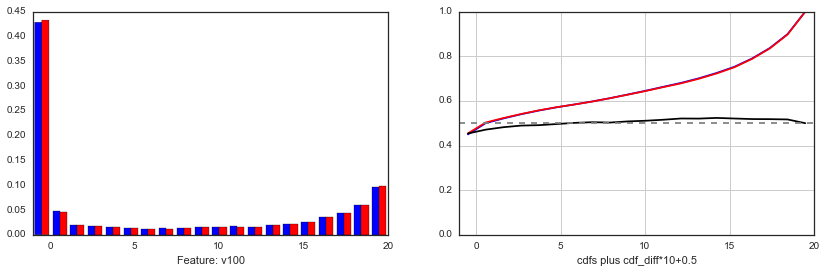

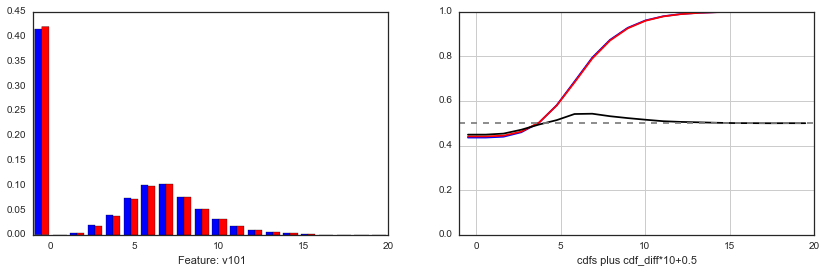

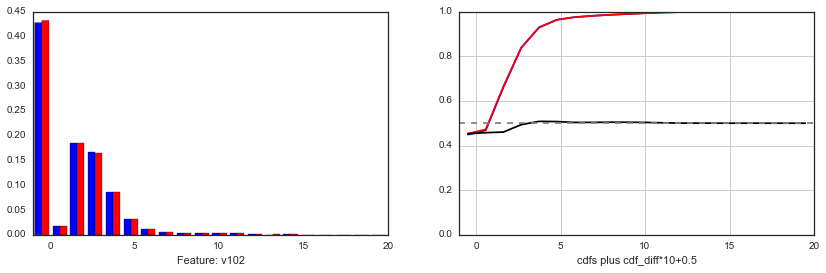

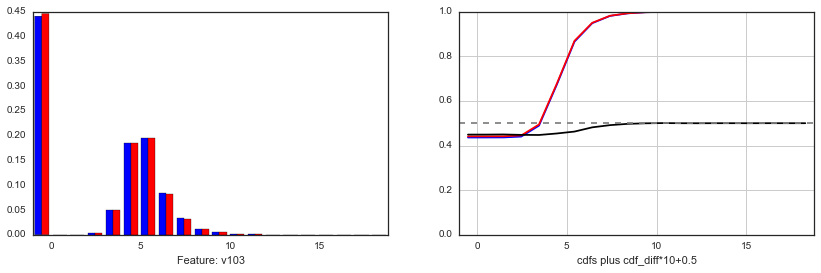

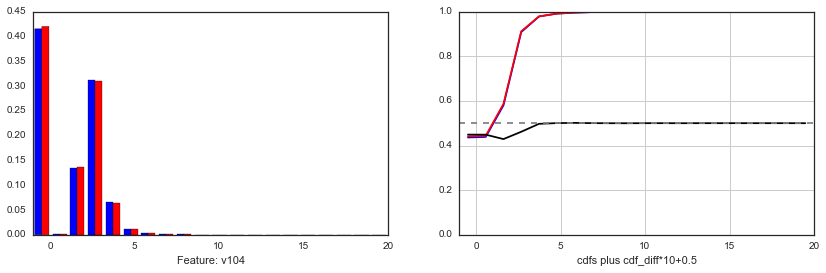

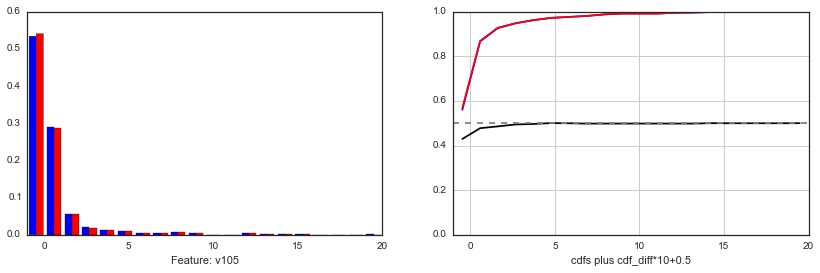

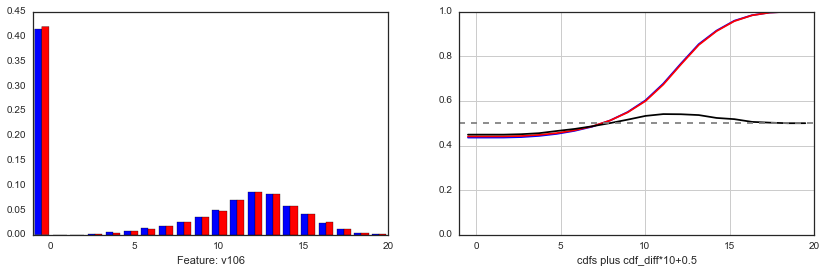

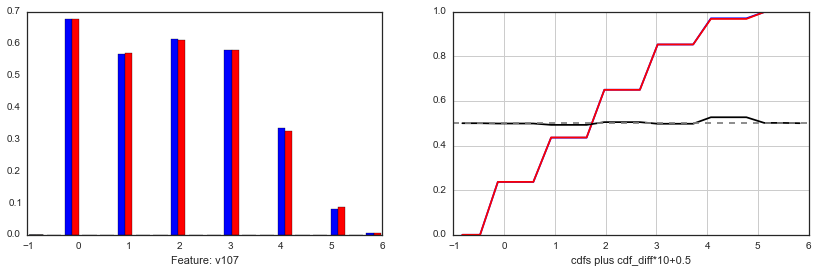

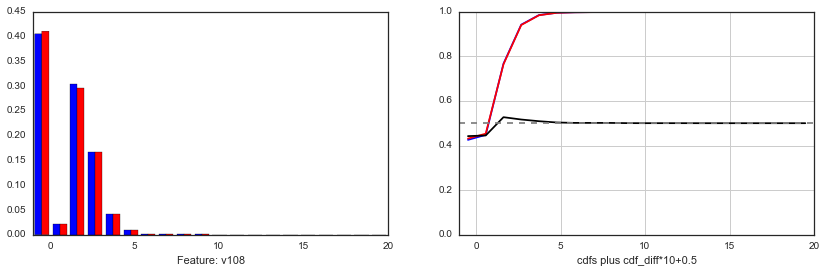

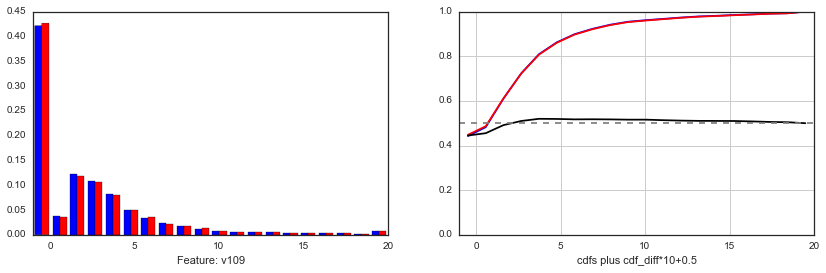

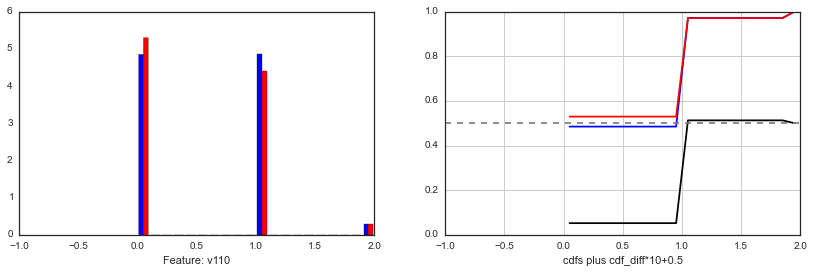

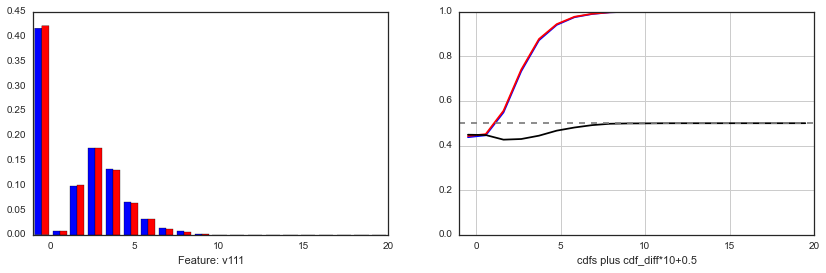

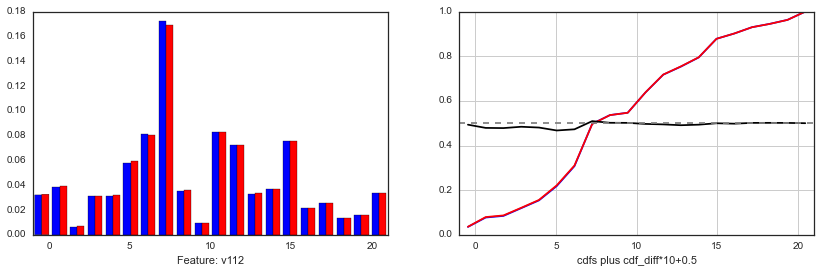

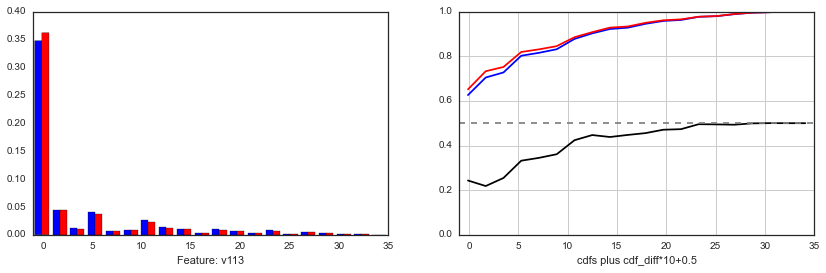

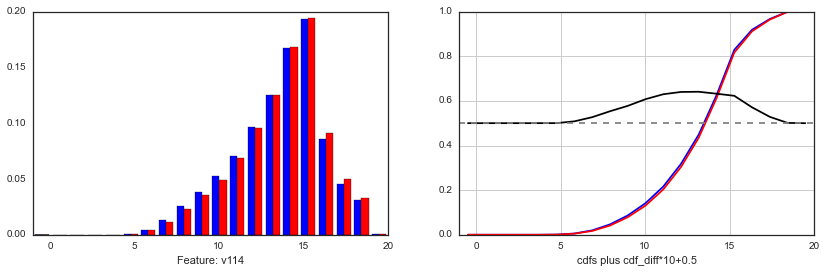

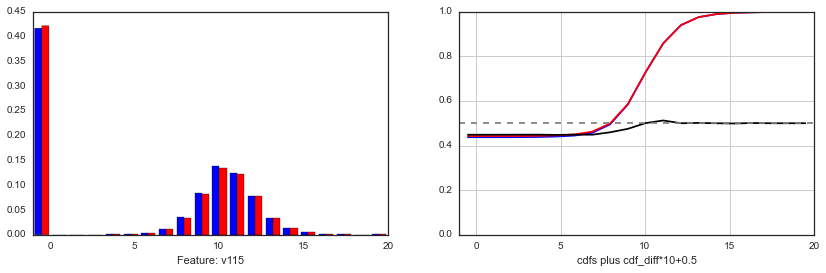

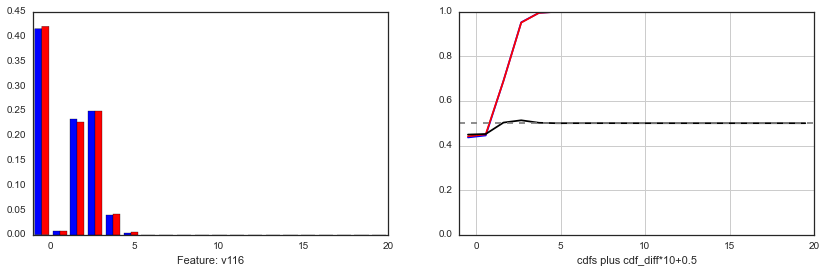

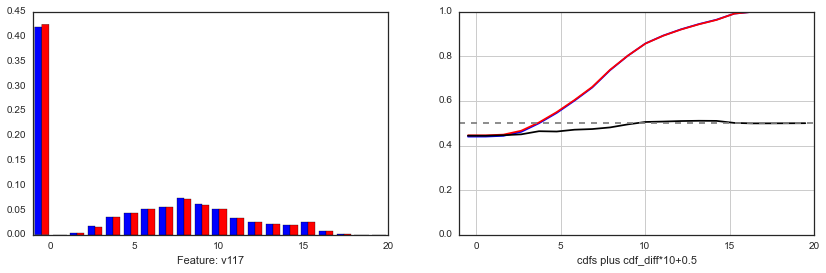

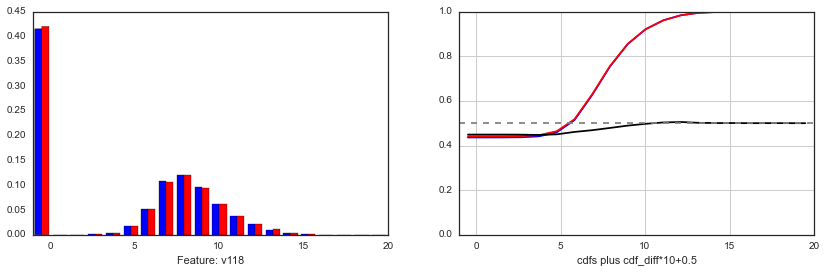

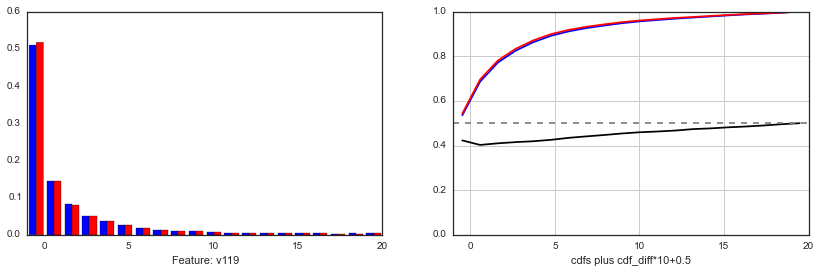

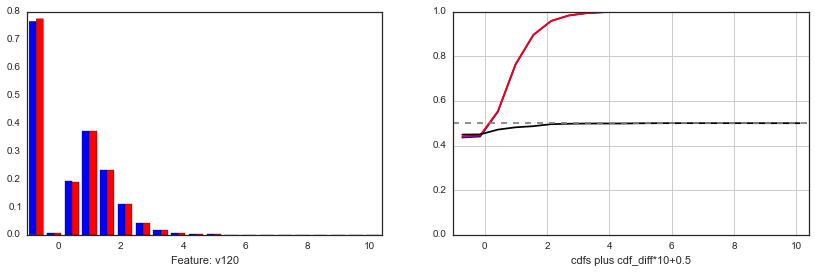

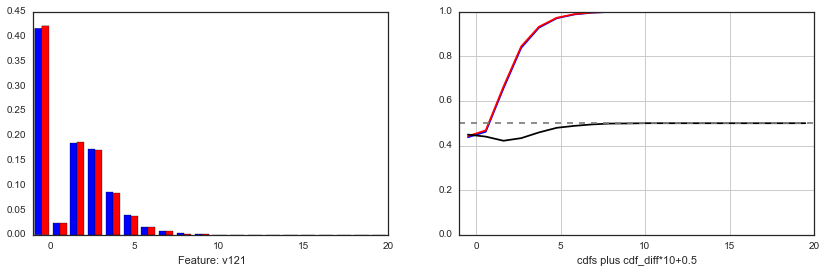

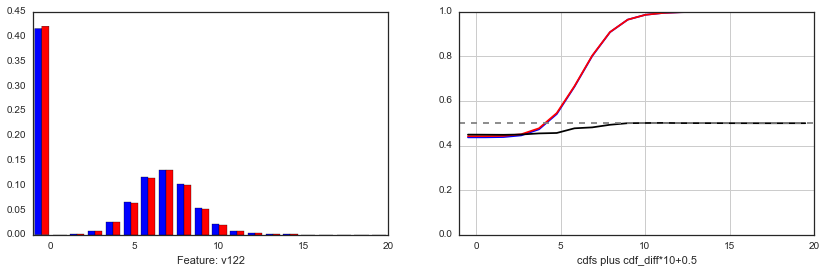

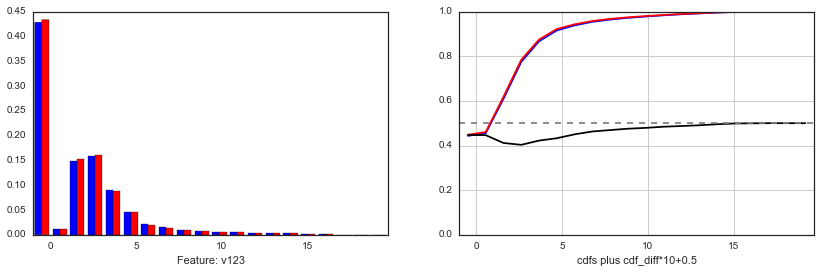

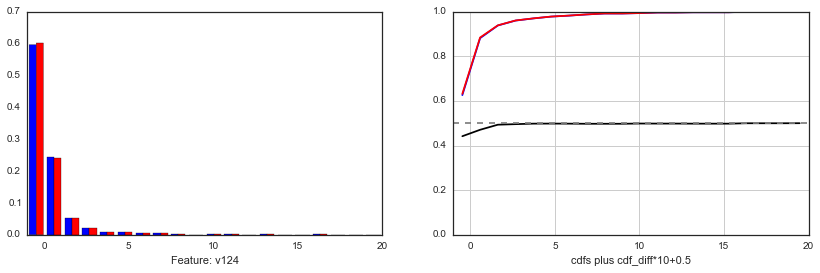

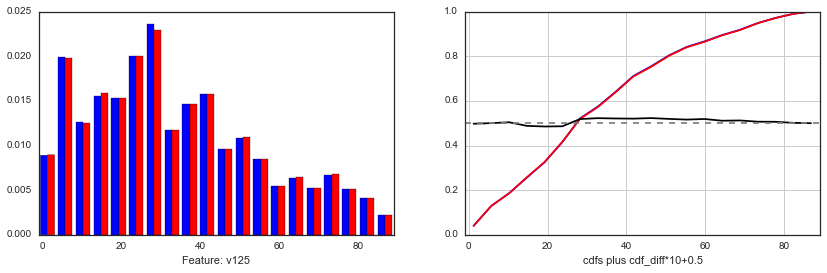

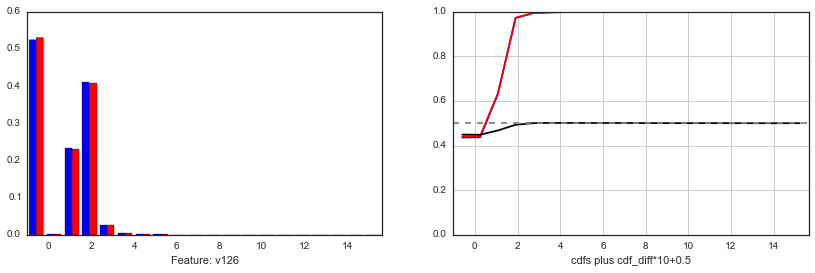

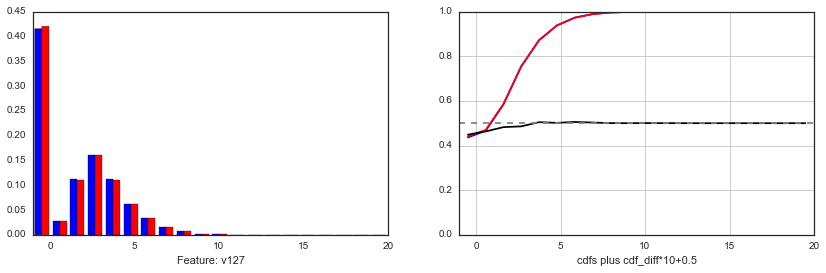

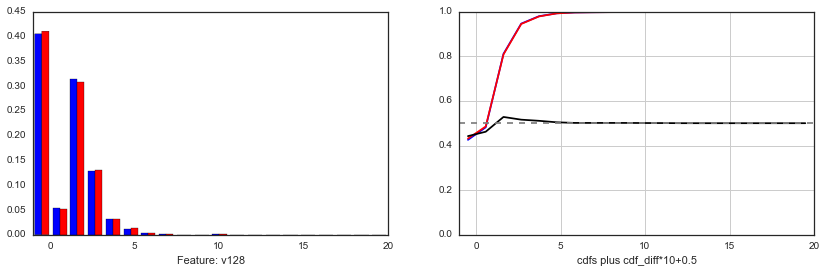

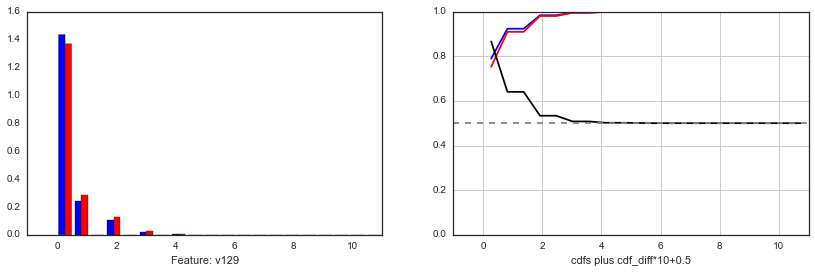

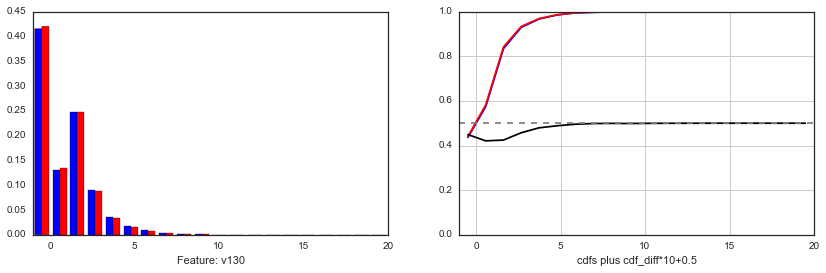

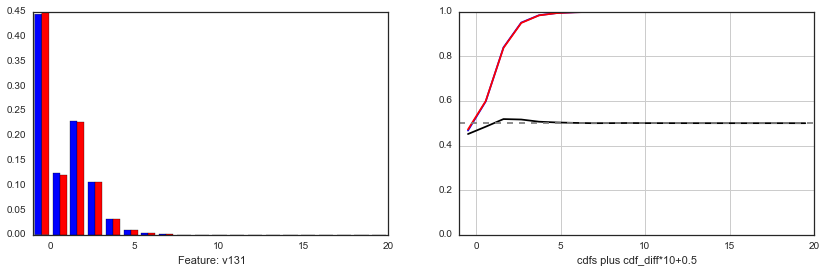

In [48]:
plt.rcParams['figure.max_open_warning']=300
nbins=20

for c in  featureNames:
    if train_df[c].dtype != 'object' and c != 'target':
        if c=='v22':
            hbins = 100
        else:
            hbins = nbins
        fig=plt.figure(figsize=(14,4))
        ax1 = fig.add_subplot(1,2,1) 
        
        dataset1 = train_df[c][~np.isnan(train_df[c])]
        dataset2 = train_df[c][~np.isnan(train_df[c]) & train_df.target]
        
        # left plot
        hd = ax1.hist((dataset1, dataset2), bins=hbins, histtype='bar',normed=True,
                        color=["blue", "red"],label=['all','target=1'])
        ax1.set_xlabel('Feature: '+c)
        ax1.set_xlim((-1,max(train_df[c])))
        
        binwidth = hd[1][1]-hd[1][0]
        midpts = (hd[1][:-1]+hd[1][1:])/2
        cdf_all= np.cumsum(hd[0][0])*binwidth
        cdf_ones = np.cumsum(hd[0][1])*binwidth
        
        # right plot
        ax2 = fig.add_subplot(1,2,2) 
        ax2.set_ylim((0,1))
        ax2.set_xlim((0,nbins))
        ax2.plot(midpts,cdf_all,color='b')
        ax2.plot(midpts,cdf_ones,color='r')
        ax2.plot(midpts,0.5+10*(cdf_all-cdf_ones),color='k')
        ax2.grid()
        ax2.set_xlim((-1,max(train_df[c])))
        ax2.set_xlabel('cdfs plus cdf_diff*10+0.5')
        ax2.axhline(0.5,color='gray',linestyle='--')

In [26]:
dataset_train = dataiku.Dataset("train")
df_train = dataset_train.get_dataframe()

### Correlation Matrix Plot

###To cluster the variables which have strong corelationship.

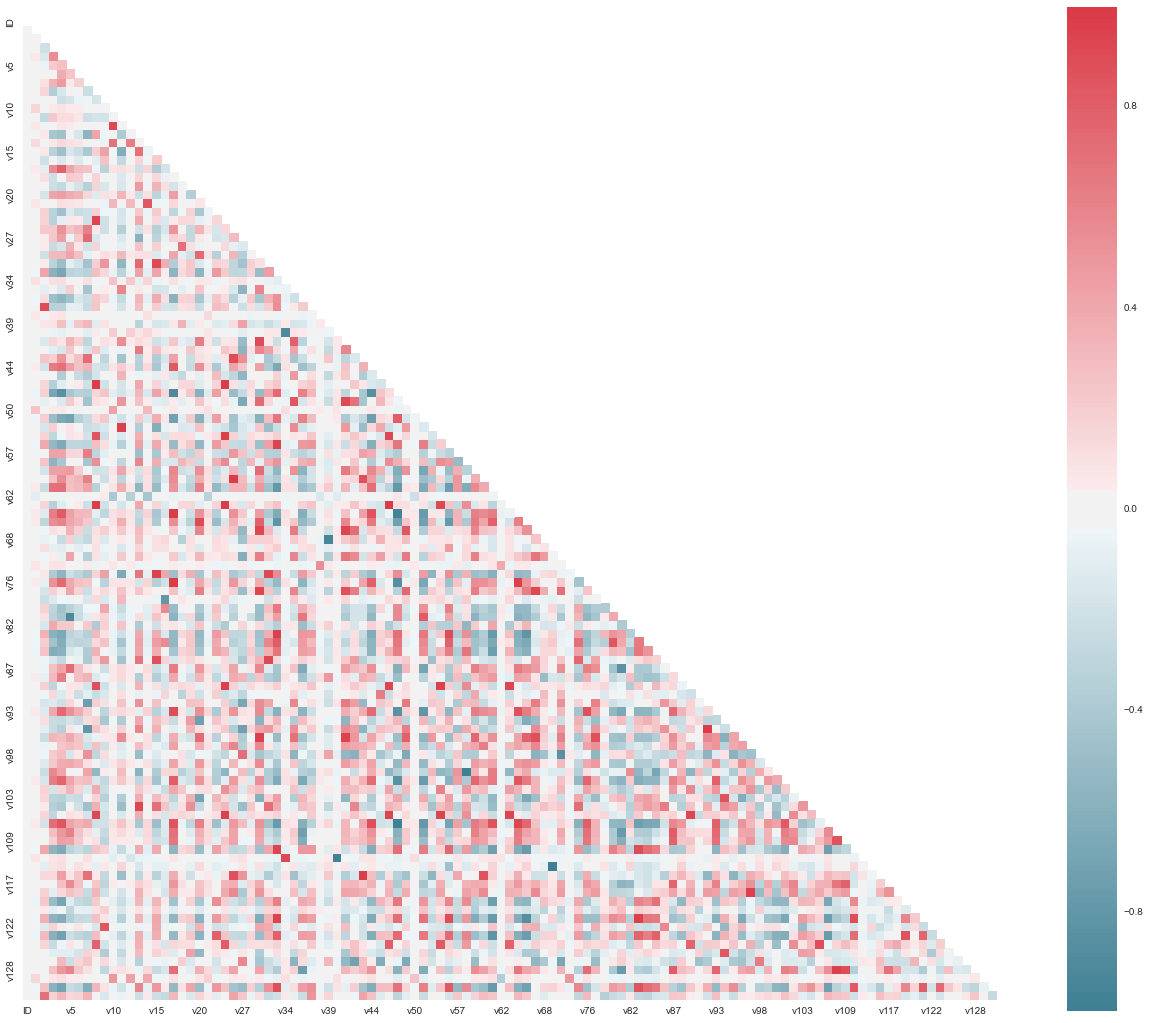

In [8]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5, ax=ax)

#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
#            square=True, xticklabels=5, yticklabels=5,
#            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [31]:
correlation_threshold = 0.7

#print corr_var.columns

high_correlation = []

for index, row in corr_var.iterrows():
    row_index_num = corr_var.index.get_loc(index)
    
    na_count = sum(dataset_train_df.iloc[:,row_index_num].isnull())
    
    for colname in corr_var.columns.values:
        col_index = corr_var.columns.get_loc(colname)
        if(col_index < row_index_num and row[colname] > correlation_threshold and row.name != colname):
            #print '{},{} = {}'.format(row.name, colname, row[colname])
            high_correlation.append({'var': (row.name, colname), 'var_corr': round(row[colname],3), 'var_na': na_count})
            #high_correlation.append([row.name, colname, round(row[colname],3), na_count])

#highly correlated and with missing values

print 'highly correlated variables with missing value'
pp.pprint([x for x in high_correlation if x['var_na'] > 0])

print '\n'

print 'highly correlated variables without missing value'
pp.pprint([x for x in high_correlation if x['var_na'] == 0])

#import csv
#high_corr_csv_path = "/Users/binlin/Documents/DataScience/bootcamp004_project/Project4-Machinelearning/correlated_vars.csv"
#with open(high_corr_csv_path, "w") as f:
#    writer = csv.writer(f)
#    writer.writerows(high_correlation)

NameError: name 'corr_var' is not defined

### Solve Problem 1: Convert All the Variable into Numeric !
#### According to the discussion on the Kaggle Forum, Kagglers should not ignore all the missing value. 
#### We did not know the definition of each variable so we cannot evaluate the affection of ignore the varables that have huge missing value.
#### In fact, we should keep as much as possible.
#### For example. "V22", the catagorical variable, has strong affact of the accuracy ! 
#### In the end, we decided to try dummy to convert the categorical varible into matrix.

In [36]:
#dummy
import pandas as pd

train_df_dummy = pd.get_dummies(train_df.v3)
train_df_dummy

,A,B,C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,0
9,0,0,1


In [35]:
#change column name
train_df_dummy = pd.get_dummies(train_df.v3)

train_df_dummy.columns = train_df.v3.name + '_' + train_df_dummy.columns
train_df_dummy

,v3_A,v3_B,v3_C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,0
9,0,0,1


###Solve Problem 2 : Impute the NA
#### 1. Impute NA by Mean
#### 2. Impute NA by KNN